decidimos fazer a previsão da probabilidade da vitoria dos times da casa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# extraindo data set e printando os 5 primeiros e 5 ultimos dados junto com as dimensoes
matches_info_df = pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/code/pre_processing_data/normalizaded_matches.csv", index_col=0)
matches_info_df

,result,performance_rank_home,B365H,B365D,B365A,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,...,B365D_classification_0,B365D_classification_1,B365D_classification_2,B365D_classification_3,B365D_classification_4,B365A_classification_0,B365A_classification_1,B365A_classification_2,B365A_classification_3,B365A_classification_4
0,0.090909,0.473684,-0.953510,-0.871429,-0.680040,0.157895,-1.000000,-1.000000,-0.333333,-0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.272727,-0.263158,-0.741112,-0.928571,-0.953862,0.684211,-1.000000,-1.000000,-0.666667,-0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.272727,-0.368421,-0.923428,-0.914286,-0.830491,-0.789474,-1.000000,-1.000000,-0.333333,-1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.454545,-0.894737,-0.868733,-0.942857,-0.905717,-0.157895,-1.000000,-1.000000,-1.000000,-0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.636364,-1.000000,-0.504102,-0.857143,-0.975426,0.789474,-1.000000,-1.000000,-1.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.272727,0.894737,-0.978122,-0.571429,-0.504514,0.368421,0.853333,-0.146667,-0.333333,-1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
376,-0.454545,0.473684,-0.979945,-0.500000,-0.504514,-0.789474,0.333333,-0.593333,-1.000000,-0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
377,-0.090909,-0.578947,-0.965360,-0.750000,-0.629890,-1.000000,-0.186667,-0.780000,-0.666667,-0.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
378,-0.090909,0.684211,-0.896080,-0.928571,-0.880642,0.263158,0.373333,-0.293333,-0.333333,-0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


iremos estimar a odd dos jogos, ou seja, utilizaremos regressão Então, a variavel dependente do meu modelo será 1/B365H, que derá a probabilidade de vitoria do time da casa. As features que usaremos para o nosso modelo de regressão serão selecionadas a partir do nosso conhecimento sobre o dominio que obtivemos a partir da nossa analise descritiva dos dados, isso aliado a analise de correlação nós ajudará a indentificar quais variaveis tem uma forte correlação com a variavel alvo Primeiro vamos remover as colunas que são derivadas da B365H

In [2]:
regression_b365h_df = matches_info_df.drop(['home_team_shots_on_target_dirty','B365D', 'B365H', 'B365A', 'B365D_log', 'B365H_log', 'B365D_classification_0', 'B365H_classification_0', 'B365D_classification_1', 'B365D_classification_2', 'B365D_classification_3', 'B365D_classification_4', 'B365A_classification_0', 'B365A_classification_1', 'B365A_classification_2', 'B365A_classification_3', 'B365A_classification_4', 'B365H_log','lay_away_prob', 'B365A_log', 'home_team_name_Manchester City', 'B365H_classification_3', 'B365H_classification_2', 'home_team_goal_count', 'away_team_goal_count'], axis=1)

In [3]:
# Calcular a correlação de Spearman de todas as colunas com 'B365H' win_home_prob lay_away_prob
correlation_matrix = regression_b365h_df.corr(method='spearman')
b365h_corr = correlation_matrix['win_home_prob']

# Filtrar correlações acima de 0.35 ou abaixo de -0.35
b365h_filtered_corr = b365h_corr[b365h_corr.abs() > 0.35]
b365h_filtered_corr

result                                0.534834
performance_rank_home                 0.668404
away_performance_rank                -0.672120
Pre-Match PPG (Home)                  0.475464
Pre-Match PPG (Away)                 -0.513770
home_team_shots                       0.474998
home_team_shots_on_target_original    0.493045
home_team_corner_count                0.398645
away_team_shots                      -0.424244
away_team_shots_on_target            -0.382638
away_team_corner_count               -0.381534
home_season_shots                     0.553766
home_season_shots_on_target           0.635610
home_team_possession                  0.772850
win_home_prob                         1.000000
Name: win_home_prob, dtype: float64

In [4]:
# Criar uma lista com os nomes das colunas que têm uma boa correlação com 'B365H'
columns_to_keep = b365h_filtered_corr.index.tolist()

# Criar um novo DataFrame apenas com essas colunas
filtered_regression_b365h_df = regression_b365h_df[columns_to_keep]

filtered_regression_b365h_df

,result,performance_rank_home,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_shots,home_team_shots_on_target_original,home_team_corner_count,away_team_shots,away_team_shots_on_target,away_team_corner_count,home_season_shots,home_season_shots_on_target,home_team_possession,win_home_prob
0,0.090909,0.473684,0.157895,-1.000000,-1.000000,-0.384615,-0.066667,-0.764706,-0.294118,-0.230769,-0.285714,-0.043478,0.541667,-0.096774,0.318930
1,-0.272727,-0.263158,0.684211,-1.000000,-1.000000,-0.153846,-0.600000,-0.647059,0.294118,-0.076923,-0.285714,-0.362319,-0.437500,-0.290323,-0.526775
2,0.272727,-0.368421,-0.789474,-1.000000,-1.000000,-0.153846,-0.333333,-0.176471,-0.411765,-0.692308,-0.428571,-0.681159,-0.395833,0.419355,0.073070
3,-0.454545,-0.894737,-0.157895,-1.000000,-1.000000,-0.153846,-0.066667,-0.411765,0.058824,0.692308,-0.285714,-0.217391,-0.375000,0.548387,-0.207657
4,-0.636364,-1.000000,0.789474,-1.000000,-1.000000,-0.538462,-0.733333,-0.764706,-0.294118,-0.230769,-0.285714,-1.000000,-0.875000,-0.387097,-0.754716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.272727,0.894737,0.368421,0.853333,-0.146667,-0.153846,-0.200000,-0.529412,-0.411765,-0.538462,-0.857143,0.420290,0.541667,0.322581,0.612930
376,-0.454545,0.473684,-0.789474,0.333333,-0.593333,0.615385,0.466667,0.294118,0.058824,-0.230769,-0.714286,-0.043478,0.541667,0.774194,0.639642
377,-0.090909,-0.578947,-1.000000,-0.186667,-0.780000,-0.461538,-0.466667,-0.529412,-0.294118,-0.384615,-0.571429,-0.449275,-0.229167,0.129032,0.446723
378,-0.090909,0.684211,0.263158,0.373333,-0.293333,-0.307692,-0.466667,-0.176471,0.294118,0.538462,-0.428571,-0.028986,0.104167,0.193548,-0.086434


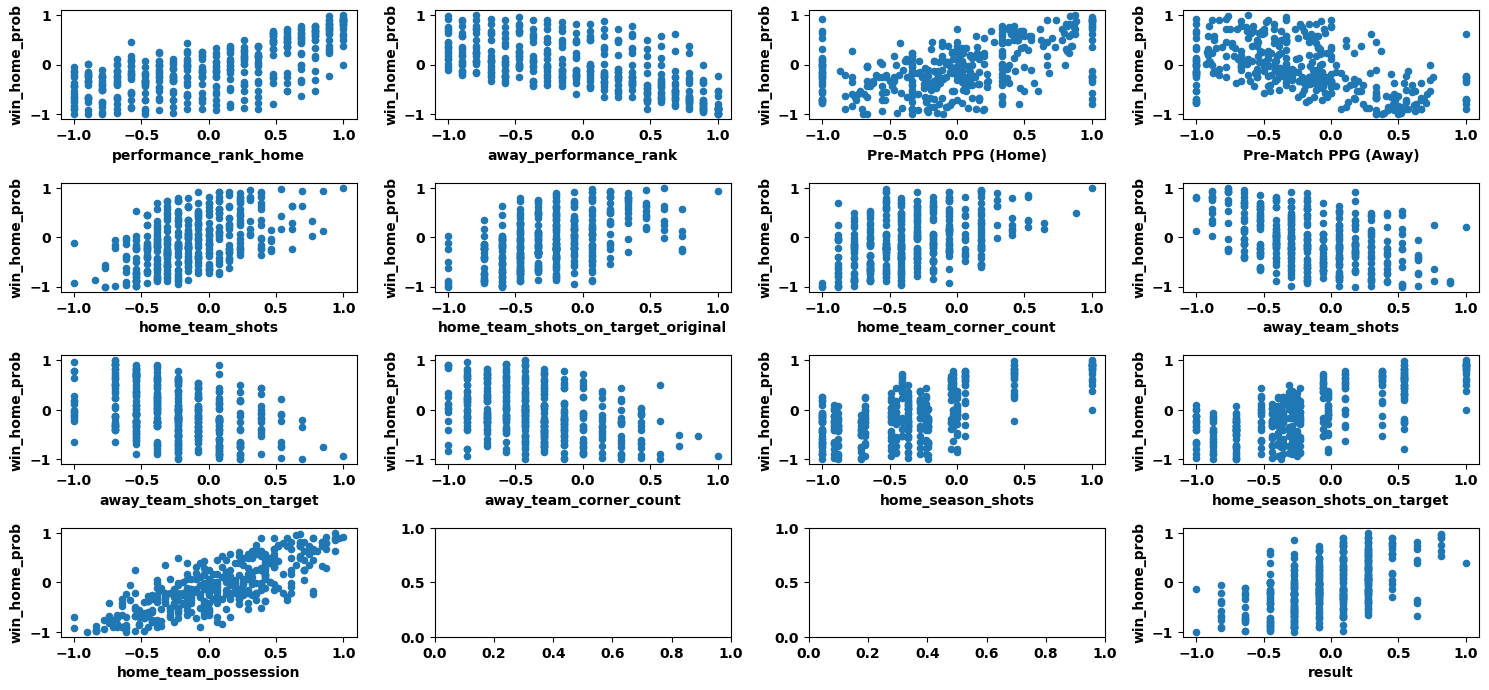

In [5]:
# Supondo que filtered_regression_b365h_df seja o seu DataFrame
figs, axes = plt.subplots(4, 4, figsize=(15, 7))
axes = axes.flatten()  # Achatar o array 2D de eixos para facilitar a indexação

for i, column in enumerate(filtered_regression_b365h_df.columns):
    if not (column == 'win_home_prob'):
        filtered_regression_b365h_df.plot.scatter(x=column, y='win_home_prob', ax=axes[i-1])

plt.tight_layout()
plt.show()

Separar os Dados em Variáveis Independentes e Dependentes

agora vamos separar os dados de treinamento e teste

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Separar as variáveis dependente e independentes
X = filtered_regression_b365h_df.drop(['win_home_prob'], axis=1)
y = filtered_regression_b365h_df['win_home_prob']

# Dividir os dados em treino, validação e teste
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir o tamanho de cada conjunto
print(f"Tamanho do conjunto de treinamento: {X_train_val.shape[0]} linhas")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} linhas")


Tamanho do conjunto de treinamento: 304 linhas
Tamanho do conjunto de teste: 76 linhas


como os dados ja estão normalizados então não será necessario Treinar o Modelo de Regressão

2. Selecionar 4 algoritmos de regressão Podemos escolher alguns dos algoritmos mais comuns para regressão:

Regressão Linear

Regressão Ridge

ElasticNet

Lasso

Agora vamos adicionar o MLFlow para rastrear o treinamento do modelo de regressão linear.

Vamos usar o GridSearchCV para selecionar os melhores hiperparâmetros do modelo de Regressão no conjunto de validação, setado a partir do conjunto de treinamento.

2024/07/11 21:43:15 INFO mlflow.tracking.fluent: Experiment with name 'Regressão da probabilidade de vitoria de futebol' does not exist. Creating a new experiment.


Modelo: Lasso
Melhores hiperparâmetros: {'alpha': 0.01}
MSE no conjunto de treinamento: 0.021593896171934388
R² no conjunto de treinamento: 0.9114313401671829
MSE no conjunto de teste: 0.0240363164981953
R² no conjunto de teste: 0.9145622192028827


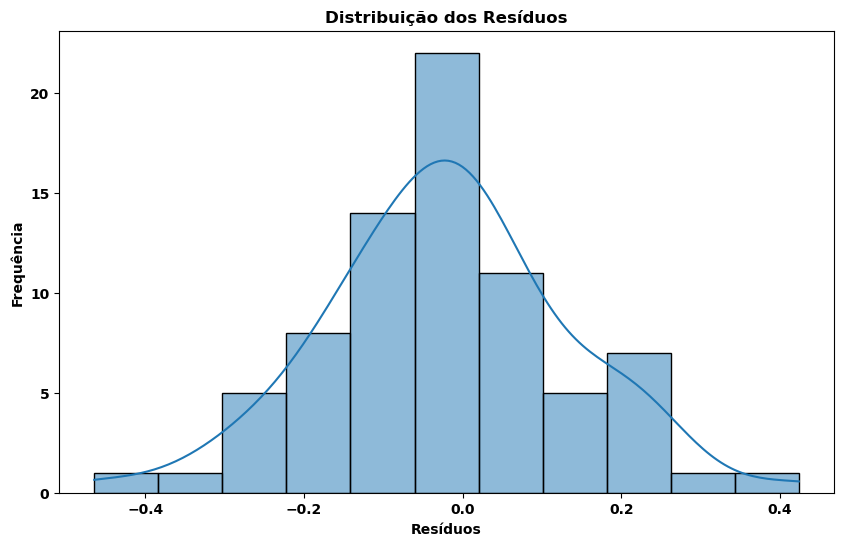

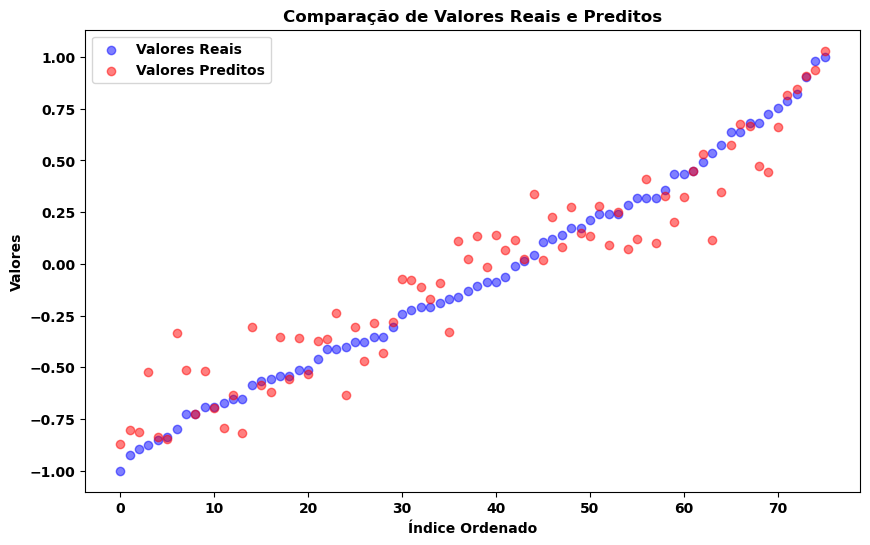

Modelo: ElasticNet
Melhores hiperparâmetros: {'alpha': 0.01, 'l1_ratio': 0.2}
MSE no conjunto de treinamento: 0.01993760739250595
R² no conjunto de treinamento: 0.9182247079004578
MSE no conjunto de teste: 0.024761938527842503
R² no conjunto de teste: 0.9119829747535424


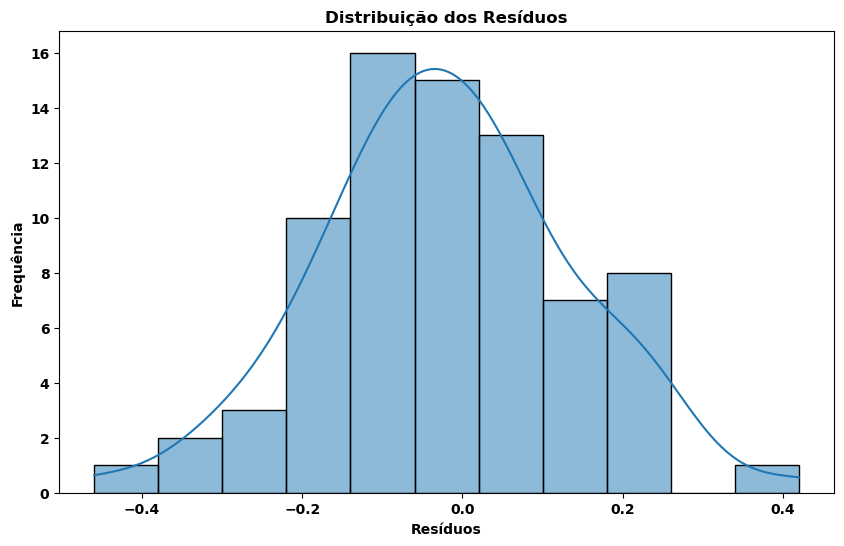

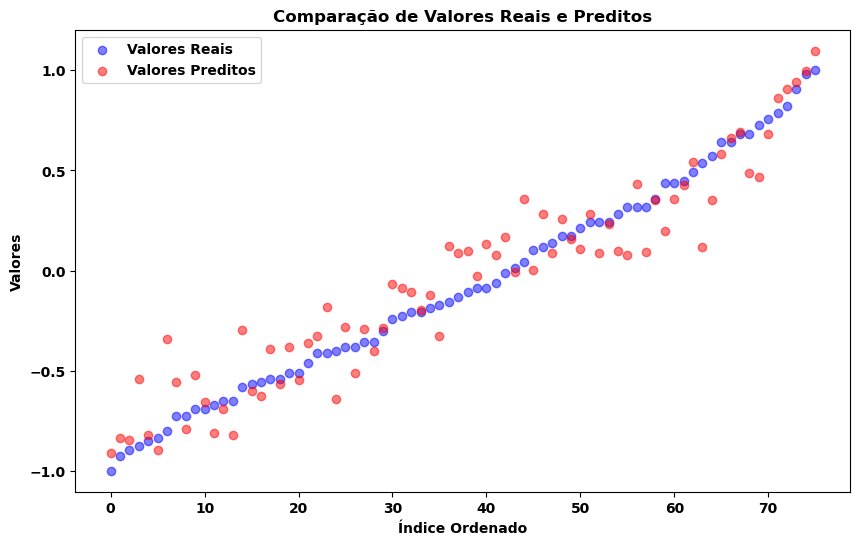

Modelo: LinearRegression
Melhores hiperparâmetros: {'fit_intercept': True}
MSE no conjunto de treinamento: 0.01923355306443524
R² no conjunto de treinamento: 0.9211124289393208
MSE no conjunto de teste: 0.024524051414558476
R² no conjunto de teste: 0.9128285513642825


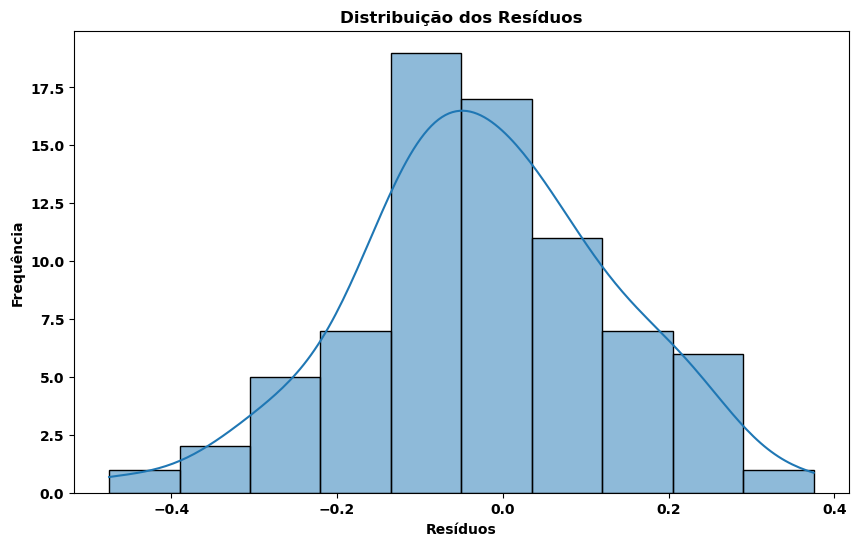

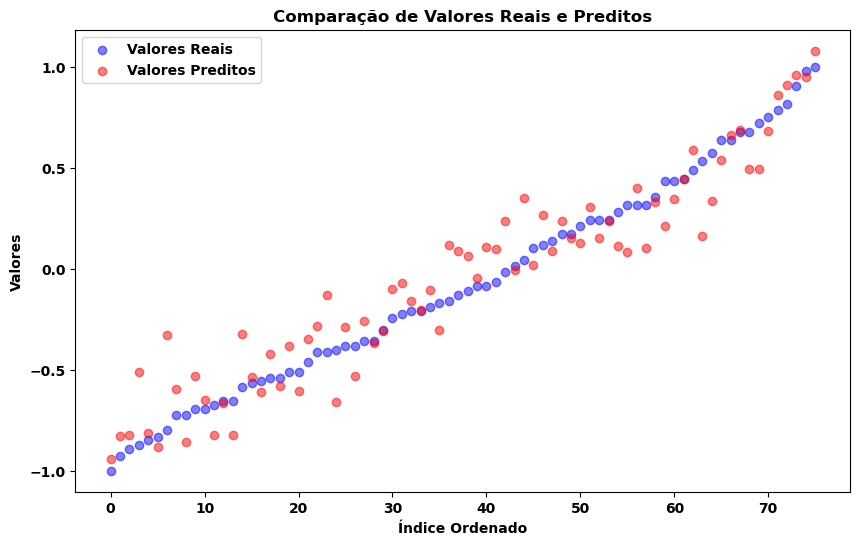

Modelo: Ridge
Melhores hiperparâmetros: {'alpha': 1.0, 'max_iter': None}
MSE no conjunto de treinamento: 0.019250249922552327
R² no conjunto de treinamento: 0.9210439457746767
MSE no conjunto de teste: 0.024567858489134908
R² no conjunto de teste: 0.9126728378532166


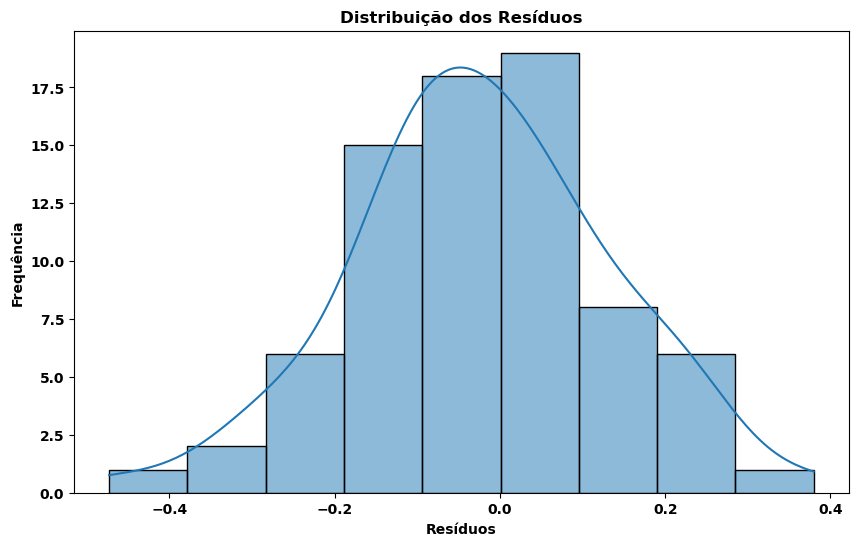

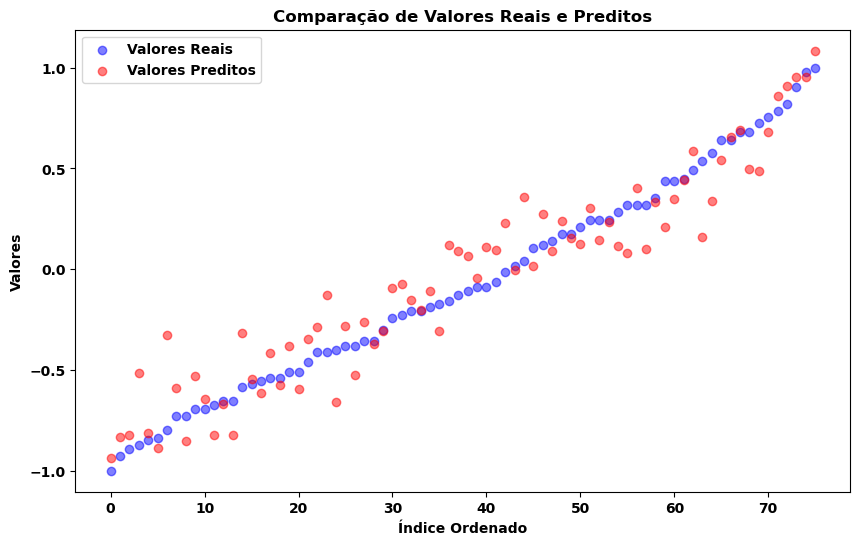

In [7]:
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, ElasticNet, Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Função para plotar os resíduos
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Resíduos')
    plt.ylabel('Frequência')
    plt.title('Distribuição dos Resíduos')
    plt.show()

# Função para plotar a importância das features
def plot_feature_importance(model, feature_names):
    feature_importances = model.feature_importances_
    importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importances_df = importances_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importances_df)
    plt.title('Importância das Features')
    plt.show()

# Função para plotar scatter plot dos pontos reais e preditos
def plot_predictions(y_true, y_pred):
    # Ordenar os valores reais e obter os índices ordenados
    sorted_indices = y_true.argsort().values
    y_true_sorted = y_true.iloc[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_true)), y_true_sorted, alpha=0.5, color='blue', label='Valores Reais')
    plt.scatter(range(len(y_pred)), y_pred_sorted, alpha=0.5, color='red', label='Valores Preditos')
    plt.xlabel('Índice Ordenado')
    plt.ylabel('Valores')
    plt.title('Comparação de Valores Reais e Preditos')
    plt.legend()
    plt.show()

# Define o local onde os experimentos serão armazenados.
mlflow.set_tracking_uri(r"file:C:\Users\diogo\repositorios\semester5\data_science\Data-Science-Project\code\regression\mlruns")

# Cria ou define o experimento que está sendo realizado.
experiment_name = "Regressão da probabilidade de vitoria de futebol"
mlflow.set_experiment(experiment_name)

# Definir os modelos e os hiperparâmetros a serem testados
models = {
    "Lasso": (Lasso(), {"alpha": [0.01, 0.1, 1.0]}),
    "ElasticNet": (ElasticNet(), {"alpha": [0.01, 0.1, 1.0], "l1_ratio": [0.2, 0.5, 0.8]}),
    "LinearRegression": (LinearRegression(), {
        "fit_intercept": [True, False],
    }),
    "Ridge": (Ridge(), {
        "alpha": [0.01, 0.1, 1.0],
        "max_iter": [None, 1000, 5000]
    }),
}

# Função para treinar e registrar o modelo com GridSearchCV e MLFlow
def train_and_log_model(model, param_grid, X_train_val, y_train_val, X_test, y_test, model_name):
    with mlflow.start_run():
        # Configurar e executar o GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error') 
        grid_search.fit(X_train_val, y_train_val)
        
        # Obter o melhor modelo e hiperparâmetros
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        
        # Fazer predições no conjunto de treinamento
        y_train_pred = best_model.predict(X_train_val)
        train_mse = mean_squared_error(y_train_val, y_train_pred)
        train_r2 = r2_score(y_train_val, y_train_pred)
        
        # Fazer predições no conjunto de teste
        y_test_pred = best_model.predict(X_test)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Logar as métricas e hiperparâmetros no MLFlow
        mlflow.log_metric("train_mse", train_mse)
        mlflow.log_metric("train_r2", train_r2)
        mlflow.log_metric("test_mse", test_mse)
        mlflow.log_metric("test_r2", test_r2)
        mlflow.log_params(best_params)
        mlflow.sklearn.log_model(best_model, model_name)
        
        print(f"Modelo: {model_name}")
        print(f"Melhores hiperparâmetros: {best_params}")
        print(f"MSE no conjunto de treinamento: {train_mse}")
        print(f"R² no conjunto de treinamento: {train_r2}")
        print(f"MSE no conjunto de teste: {test_mse}")
        print(f"R² no conjunto de teste: {test_r2}")
        
        # Plotar os resíduos no conjunto de teste
        plot_residuals(y_test, y_test_pred)

        # Plotar o scatter plot dos pontos reais e preditos
        plot_predictions(y_test, y_test_pred)
        
        # Analisar a importância das features (para modelos de árvore, por exemplo)
        if hasattr(best_model, "feature_importances_"):
            plot_feature_importance(best_model, X_train_val.columns)
        
        return


# Treinar e logar cada modelo
for model_name, (model, param_grid) in models.items():
    train_and_log_model(model, param_grid, X_train_val, y_train_val, X_test, y_test, model_name)


Baseando-se nos valores de MSE e R² no conjunto de teste:

Lasso apresenta o menor MSE (0.0240363164981953) e o maior R² (0.9145622192028827).
Portanto, Lasso é o melhor modelo dentre os testados, considerando o desempenho no conjunto de teste.